In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

pd.set_option('display.max_columns', None)

In [3]:
traffic = pd.read_csv('../Transportation/CO_VMT18/co_aadt_2018_updated.csv')

In [4]:
traffic.head()

,Unnamed: 0,objectid,year_record,state_code,route_id,begin_point,end_point,aadt,access_control_,county_code,f_system,facility_type,iri,iri_year,nhs,ownership,psr,route_number,route_name,route_qualifier,route_signing,speed_limit,strahnet_type,structure_type,surface_type,through_lanes,toll_charged,toll_type,truck,urban_code,Rural?,func_R/U,aadt_Motorcycle,aadt_Passenger cars,aadt_Light trucks,aadt_Buses,aadt_SU trucks,aadt_CU trucks
0,0,1,2018,8,006A,13.1,13.200,12000.0,2.0,77.0,3,2,103.0,NaN,1.0,1.0,NaN,6.0,006A,1.0,3.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,34273,U,U_3,11.320565,5830.090726,5377.268145,11.320565,470.0,300.0
1,1,2,2018,8,394A,3.6,3.700,690.0,2.0,81.0,5,2,108.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,99998,U,U_5,5.804481,290.224033,269.908350,4.063136,50.0,70.0
2,2,3,2018,8,041-0-2013-0287,2.4,2.500,5000.0,3.0,41.0,4,2,129.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,55.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,99999,R,R_4,37.170883,2453.278265,2279.814146,29.736706,190.0,10.0
3,3,4,2018,8,040A,158.8,158.900,2100.0,2.0,49.0,3,2,126.0,NaN,1.0,1.0,NaN,40.0,040A,1.0,3.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,1.0,99999,R,R_3,1.951482,936.711590,868.409704,2.927224,110.0,180.0
4,4,5,2018,8,026B,1.4,1.437,29000.0,2.0,31.0,3,2,452.0,NaN,1.0,1.0,NaN,26.0,026B,1.0,4.0,NaN,NaN,NaN,3.0,5.0,NaN,NaN,NaN,23527,U,U_3,28.508065,14681.653226,13541.330645,28.508065,490.0,230.0


In [5]:
traffic.insert(6, 'road_length', traffic['end_point']- traffic['begin_point'])

In [6]:
traffic

,Unnamed: 0,objectid,year_record,state_code,route_id,begin_point,road_length,end_point,aadt,access_control_,county_code,f_system,facility_type,iri,iri_year,nhs,ownership,psr,route_number,route_name,route_qualifier,route_signing,speed_limit,strahnet_type,structure_type,surface_type,through_lanes,toll_charged,toll_type,truck,urban_code,Rural?,func_R/U,aadt_Motorcycle,aadt_Passenger cars,aadt_Light trucks,aadt_Buses,aadt_SU trucks,aadt_CU trucks
0,0,1,2018,8,006A,13.1,0.100,13.200,12000.0,2.0,77.0,3,2,103.0,NaN,1.0,1.0,NaN,6.0,006A,1.0,3.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,34273,U,U_3,11.320565,5830.090726,5377.268145,11.320565,470.0,300.0
1,1,2,2018,8,394A,3.6,0.100,3.700,690.0,2.0,81.0,5,2,108.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,99998,U,U_5,5.804481,290.224033,269.908350,4.063136,50.0,70.0
2,2,3,2018,8,041-0-2013-0287,2.4,0.100,2.500,5000.0,3.0,41.0,4,2,129.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,55.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,99999,R,R_4,37.170883,2453.278265,2279.814146,29.736706,190.0,10.0
3,3,4,2018,8,040A,158.8,0.100,158.900,2100.0,2.0,49.0,3,2,126.0,NaN,1.0,1.0,NaN,40.0,040A,1.0,3.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,1.0,99999,R,R_3,1.951482,936.711590,868.409704,2.927224,110.0,180.0
4,4,5,2018,8,026B,1.4,0.037,1.437,29000.0,2.0,31.0,3,2,452.0,NaN,1.0,1.0,NaN,26.0,026B,1.0,4.0,NaN,NaN,NaN,3.0,5.0,NaN,NaN,NaN,23527,U,U_3,28.508065,14681.653226,13541.330645,28.508065,490.0,230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127242,127540,127541,2018,8,149A,2.1,0.100,2.200,2000.0,2.0,105.0,4,2,63.0,NaN,NaN,1.0,NaN,149.0,149A,1.0,4.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,99999,R,R_4,14.558596,960.867321,892.927207,11.646877,60.0,60.0
127243,127541,127542,2018,8,006A,1.6,0.100,1.700,870.0,2.0,77.0,5,2,142.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,99999,R,R_5,8.144330,399.072165,374.639175,8.144330,30.0,50.0
127244,127542,127543,2018,8,010A,14.7,0.100,14.800,410.0,2.0,55.0,4,2,212.0,NaN,NaN,1.0,NaN,10.0,010A,1.0,4.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,1.0,99999,R,R_4,2.485803,164.062984,152.462571,1.988642,9.0,80.0
127245,127543,127544,2018,8,096D,21.6,0.100,21.700,480.0,2.0,61.0,4,2,182.0,NaN,NaN,1.0,NaN,96.0,096D,1.0,4.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,1.0,99999,R,R_4,2.555498,168.662881,156.737223,2.044399,20.0,130.0


In [7]:
traffic.insert(10, 'vmt_all', traffic['aadt']* traffic['road_length'])
traffic.insert(11, 'vmt_comb', traffic['aadt_combination']* traffic['road_length'])
traffic.insert(12, 'vmt_single', traffic['aadt_single_unit']* traffic['road_length'])

KeyError: 'aadt_combination'

In [8]:
traffic

,Unnamed: 0,objectid,year_record,state_code,route_id,begin_point,road_length,end_point,aadt,access_control_,vmt_all,county_code,f_system,facility_type,iri,iri_year,nhs,ownership,psr,route_number,route_name,route_qualifier,route_signing,speed_limit,strahnet_type,structure_type,surface_type,through_lanes,toll_charged,toll_type,truck,urban_code,Rural?,func_R/U,aadt_Motorcycle,aadt_Passenger cars,aadt_Light trucks,aadt_Buses,aadt_SU trucks,aadt_CU trucks
0,0,1,2018,8,006A,13.1,0.100,13.200,12000.0,2.0,1200.0,77.0,3,2,103.0,NaN,1.0,1.0,NaN,6.0,006A,1.0,3.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,34273,U,U_3,11.320565,5830.090726,5377.268145,11.320565,470.0,300.0
1,1,2,2018,8,394A,3.6,0.100,3.700,690.0,2.0,69.0,81.0,5,2,108.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,99998,U,U_5,5.804481,290.224033,269.908350,4.063136,50.0,70.0
2,2,3,2018,8,041-0-2013-0287,2.4,0.100,2.500,5000.0,3.0,500.0,41.0,4,2,129.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,55.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,99999,R,R_4,37.170883,2453.278265,2279.814146,29.736706,190.0,10.0
3,3,4,2018,8,040A,158.8,0.100,158.900,2100.0,2.0,210.0,49.0,3,2,126.0,NaN,1.0,1.0,NaN,40.0,040A,1.0,3.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,1.0,99999,R,R_3,1.951482,936.711590,868.409704,2.927224,110.0,180.0
4,4,5,2018,8,026B,1.4,0.037,1.437,29000.0,2.0,1073.0,31.0,3,2,452.0,NaN,1.0,1.0,NaN,26.0,026B,1.0,4.0,NaN,NaN,NaN,3.0,5.0,NaN,NaN,NaN,23527,U,U_3,28.508065,14681.653226,13541.330645,28.508065,490.0,230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127242,127540,127541,2018,8,149A,2.1,0.100,2.200,2000.0,2.0,200.0,105.0,4,2,63.0,NaN,NaN,1.0,NaN,149.0,149A,1.0,4.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,99999,R,R_4,14.558596,960.867321,892.927207,11.646877,60.0,60.0
127243,127541,127542,2018,8,006A,1.6,0.100,1.700,870.0,2.0,87.0,77.0,5,2,142.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,99999,R,R_5,8.144330,399.072165,374.639175,8.144330,30.0,50.0
127244,127542,127543,2018,8,010A,14.7,0.100,14.800,410.0,2.0,41.0,55.0,4,2,212.0,NaN,NaN,1.0,NaN,10.0,010A,1.0,4.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,1.0,99999,R,R_4,2.485803,164.062984,152.462571,1.988642,9.0,80.0
127245,127543,127544,2018,8,096D,21.6,0.100,21.700,480.0,2.0,48.0,61.0,4,2,182.0,NaN,NaN,1.0,NaN,96.0,096D,1.0,4.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,1.0,99999,R,R_4,2.555498,168.662881,156.737223,2.044399,20.0,130.0


In [184]:
cols = traffic.columns

In [185]:
vmt_cols = cols[cols.str.contains('vmt')]
vmt_cols = list(vmt_cols)
print(vmt_cols)

['vmt_all', 'vmt_comb', 'vmt_single']


In [186]:
traffic = traffic[vmt_cols]

In [187]:
traffic

,vmt_all,vmt_comb,vmt_single
0,1200.000,30.000,47.000
1,69.000,7.000,5.000
2,500.000,1.000,19.000
3,210.000,18.000,11.000
4,1073.000,8.510,18.130
...,...,...,...
127540,200.000,6.000,6.000
127541,87.000,5.000,3.000
127542,41.000,8.000,0.900
127543,48.000,13.000,2.000


In [188]:
traffic_sample = traffic.dropna().sum()

In [189]:
traffic_sample

vmt_all      130860102.750
vmt_comb       5518002.168
vmt_single     3377921.046
dtype: float64

In [190]:
traffic_sample = pd.DataFrame({'Vehicle Type':traffic_sample.index, 'VMT':traffic_sample.values}).set_index('Vehicle Type')

In [191]:
traffic_sample

,VMT
Vehicle Type,
vmt_all,130860102.750
vmt_comb,5518002.168
vmt_single,3377921.046


In [192]:
pct_comb = traffic_sample.loc['vmt_comb']['VMT'] / traffic_sample.loc['vmt_all']['VMT']

In [193]:
pct_comb

0.04216718504754516

In [194]:
pct_single = traffic_sample.loc['vmt_single']['VMT'] / traffic_sample.loc['vmt_all']['VMT']

In [195]:
pct_single

0.025813223243858117

In [196]:
traffic

,vmt_all,vmt_comb,vmt_single
0,1200.000,30.000,47.000
1,69.000,7.000,5.000
2,500.000,1.000,19.000
3,210.000,18.000,11.000
4,1073.000,8.510,18.130
...,...,...,...
127540,200.000,6.000,6.000
127541,87.000,5.000,3.000
127542,41.000,8.000,0.900
127543,48.000,13.000,2.000


In [197]:
traffic['vmt_comb'] = traffic['vmt_comb'].fillna(0.0790 * traffic['vmt_all'])

/Users/AnnieDillon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [198]:
traffic

,vmt_all,vmt_comb,vmt_single
0,1200.000,30.000,47.000
1,69.000,7.000,5.000
2,500.000,1.000,19.000
3,210.000,18.000,11.000
4,1073.000,8.510,18.130
...,...,...,...
127540,200.000,6.000,6.000
127541,87.000,5.000,3.000
127542,41.000,8.000,0.900
127543,48.000,13.000,2.000


In [199]:
traffic['vmt_single'] = traffic['vmt_single'].fillna(0.0271 * traffic['vmt_all'])

/Users/AnnieDillon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [200]:
traffic

,vmt_all,vmt_comb,vmt_single
0,1200.000,30.000,47.000
1,69.000,7.000,5.000
2,500.000,1.000,19.000
3,210.000,18.000,11.000
4,1073.000,8.510,18.130
...,...,...,...
127540,200.000,6.000,6.000
127541,87.000,5.000,3.000
127542,41.000,8.000,0.900
127543,48.000,13.000,2.000


In [201]:
traffic.columns = [column.replace('vmt_','') for column in traffic]

In [202]:
traffic

,all,comb,single
0,1200.000,30.000,47.000
1,69.000,7.000,5.000
2,500.000,1.000,19.000
3,210.000,18.000,11.000
4,1073.000,8.510,18.130
...,...,...,...
127540,200.000,6.000,6.000
127541,87.000,5.000,3.000
127542,41.000,8.000,0.900
127543,48.000,13.000,2.000


In [203]:
#traffic['FUNCCODE'].replace({1.0: 'Interstate', 2.0: 'Freeway/Expressway', 3.0: 'Other Principal Arterial', 4.0: 'Minor Arterial', 5.0: 'Major Collector', 6.0: 'Minor Collector', 7.0: 'Local Road or Street'}, inplace=True)

In [204]:
traffic = traffic.sum()

In [205]:
traffic

all      133917328.780
comb       5759523.024
single     3460771.871
dtype: float64

In [206]:
emissions = pd.DataFrame({'Vehicle Type':traffic.index, 'VMT':traffic.values}).set_index('Vehicle Type')

In [207]:
emissions['VMT'] = emissions['VMT'] * 365

In [208]:
emissions

,VMT
Vehicle Type,
all,48879825004.700
comb,2102225903.895
single,1263181733.066


In [209]:
mapping = {
    'all': 'Average Vehicle',
    'comb': 'Heavy-duty vehicles',
    'single': 'Heavy-duty vehicles',
    }

In [210]:
emissionfactors = pd.read_csv('../Transportation/USDOT_BTS_USAvgMobileSourceEmissionFactors_HCcoNOXpm25_byVehicleType_April2020.csv')

In [211]:
emissionfactors

,Fuel Type,Vehicle Type,pollutant,emissions (grams/mile)
0,gasoline,Light-duty vehicles,Total HC,0.350
1,gasoline,Light-duty vehicles,Exhaust CO,3.941
2,gasoline,Light-duty vehicles,Exhaust NOx,0.289
3,gasoline,Light-duty vehicles,Exhaust PM2.5,0.008
4,gasoline,Light-duty vehicles,Brakewear PM2.5,0.003
5,gasoline,Light-duty vehicles,Tirewear PM2.5,0.001
6,gasoline,Light-duty vehicles,Co2,362.800
7,gasoline,Light-duty trucks,Total HC,0.421
8,gasoline,Light-duty trucks,Exhaust CO,5.655
9,gasoline,Light-duty trucks,Exhaust NOx,0.478


In [212]:
pollutants = ['HC', 'CO', 'NOx', 'PM2.5', 'Co2']

In [213]:
for fuel in np.unique(emissionfactors['Fuel Type']):
    for pollutant in np.unique(emissionfactors['pollutant']):
        emissions[fuel+'_'+pollutant] = np.zeros(emissions.shape[0])

In [214]:
emissions

,VMT,both_Brakewear PM2.5,both_Co2,both_Exhaust CO,both_Exhaust NOx,both_Exhaust PM2.5,both_Tirewear PM2.5,both_Total HC,diesel_Brakewear PM2.5,diesel_Co2,diesel_Exhaust CO,diesel_Exhaust NOx,diesel_Exhaust PM2.5,diesel_Tirewear PM2.5,diesel_Total HC,gasoline_Brakewear PM2.5,gasoline_Co2,gasoline_Exhaust CO,gasoline_Exhaust NOx,gasoline_Exhaust PM2.5,gasoline_Tirewear PM2.5,gasoline_Total HC
Vehicle Type,,,,,,,,,,,,,,,,,,,,,,
all,48879825004.700,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
comb,2102225903.895,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
single,1263181733.066,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [215]:
emissionfactors

,Fuel Type,Vehicle Type,pollutant,emissions (grams/mile)
0,gasoline,Light-duty vehicles,Total HC,0.350
1,gasoline,Light-duty vehicles,Exhaust CO,3.941
2,gasoline,Light-duty vehicles,Exhaust NOx,0.289
3,gasoline,Light-duty vehicles,Exhaust PM2.5,0.008
4,gasoline,Light-duty vehicles,Brakewear PM2.5,0.003
5,gasoline,Light-duty vehicles,Tirewear PM2.5,0.001
6,gasoline,Light-duty vehicles,Co2,362.800
7,gasoline,Light-duty trucks,Total HC,0.421
8,gasoline,Light-duty trucks,Exhaust CO,5.655
9,gasoline,Light-duty trucks,Exhaust NOx,0.478


In [216]:
for ind in emissions.index:
    vehicle_type = mapping[ind]
    for fuel in np.unique(emissionfactors['Fuel Type']):
        for pollutant in np.unique(emissionfactors['pollutant']):
            row = np.logical_and(np.logical_and(emissionfactors['Fuel Type'] == fuel, 
               emissionfactors['pollutant'] == pollutant),
               emissionfactors['Vehicle Type'] == vehicle_type
              )
            if np.sum(row) == 0:
                emissions.loc[ind][fuel+'_'+pollutant] = np.nan
            else:
                assert(np.sum(row) == 1)
                emissions.loc[ind][fuel+'_'+pollutant] = emissionfactors.loc[row]['emissions (grams/mile)']
            

In [217]:
emissions

,VMT,both_Brakewear PM2.5,both_Co2,both_Exhaust CO,both_Exhaust NOx,both_Exhaust PM2.5,both_Tirewear PM2.5,both_Total HC,diesel_Brakewear PM2.5,diesel_Co2,diesel_Exhaust CO,diesel_Exhaust NOx,diesel_Exhaust PM2.5,diesel_Tirewear PM2.5,diesel_Total HC,gasoline_Brakewear PM2.5,gasoline_Co2,gasoline_Exhaust CO,gasoline_Exhaust NOx,gasoline_Exhaust PM2.5,gasoline_Tirewear PM2.5,gasoline_Total HC
Vehicle Type,,,,,,,,,,,,,,,,,,,,,,
all,48879825004.700,0.004,510.000,4.729,0.929,0.029,0.002,0.430,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
comb,2102225903.895,nan,nan,nan,nan,nan,nan,nan,0.013,1436.988,1.994,5.971,0.213,0.004,0.645,0.009,1659.735,21.352,1.416,0.030,0.002,1.160
single,1263181733.066,nan,nan,nan,nan,nan,nan,nan,0.013,1436.988,1.994,5.971,0.213,0.004,0.645,0.009,1659.735,21.352,1.416,0.030,0.002,1.160


In [218]:
for i in pollutants:
    emissions[str(i)] = np.zeros(emissions.shape[0])

In [219]:
diesel_cols = list(emissions.columns[emissions.columns.str.contains('diesel')])
diesel_cols

['diesel_Brakewear PM2.5',
 'diesel_Co2',
 'diesel_Exhaust CO',
 'diesel_Exhaust NOx',
 'diesel_Exhaust PM2.5',
 'diesel_Tirewear PM2.5',
 'diesel_Total HC']

In [220]:
gasoline_cols = list(emissions.columns[emissions.columns.str.contains('gasoline')])
gasoline_cols

['gasoline_Brakewear PM2.5',
 'gasoline_Co2',
 'gasoline_Exhaust CO',
 'gasoline_Exhaust NOx',
 'gasoline_Exhaust PM2.5',
 'gasoline_Tirewear PM2.5',
 'gasoline_Total HC']

In [221]:
both_cols = list(emissions.columns[emissions.columns.str.contains('both')])
both_cols

['both_Brakewear PM2.5',
 'both_Co2',
 'both_Exhaust CO',
 'both_Exhaust NOx',
 'both_Exhaust PM2.5',
 'both_Tirewear PM2.5',
 'both_Total HC']

In [222]:
for ind in emissions.index:
    vehicle_type = mapping[ind]
    for i in pollutants:
        diesel_ef = [k for k in diesel_cols if str(i) in k]
        gas_ef = [k for k in gasoline_cols if str(i) in k]
        both_ef = [k for k in both_cols if str(i) in k]
        if vehicle_type == 'Heavy-duty vehicles':
            emissions.loc[ind][str(i)] = ((emissions.loc[ind]['VMT'] * .894*1.013 * emissions.loc[ind][diesel_ef].sum()) + (emissions.loc[ind]['VMT'] * .106 * emissions.loc[ind][gas_ef].sum()))/1000000
        elif vehicle_type == 'Average Vehicle':
            emissions.loc[ind][str(i)] = ((emissions.loc[ind]['VMT'] * emissions.loc[ind][both_ef].sum()))/1000000

In [223]:
emissions = emissions.reset_index()

In [224]:
emissions

,Vehicle Type,VMT,both_Brakewear PM2.5,both_Co2,both_Exhaust CO,both_Exhaust NOx,both_Exhaust PM2.5,both_Tirewear PM2.5,both_Total HC,diesel_Brakewear PM2.5,diesel_Co2,diesel_Exhaust CO,diesel_Exhaust NOx,diesel_Exhaust PM2.5,diesel_Tirewear PM2.5,diesel_Total HC,gasoline_Brakewear PM2.5,gasoline_Co2,gasoline_Exhaust CO,gasoline_Exhaust NOx,gasoline_Exhaust PM2.5,gasoline_Tirewear PM2.5,gasoline_Total HC,HC,CO,NOx,PM2.5,Co2
0,all,48879825004.700,0.004,510.000,4.729,0.929,0.029,0.002,0.430,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,20994.903,231167.252,45417.818,1668.956,24928710.752
1,comb,2102225903.895,nan,nan,nan,nan,nan,nan,nan,0.013,1436.988,1.994,5.971,0.213,0.004,0.645,0.009,1659.735,21.352,1.416,0.030,0.002,1.160,1486.455,8554.214,11683.257,447.015,3105618.026
2,single,1263181733.066,nan,nan,nan,nan,nan,nan,nan,0.013,1436.988,1.994,5.971,0.213,0.004,0.645,0.009,1659.735,21.352,1.416,0.030,0.002,1.160,893.178,5140.041,7020.215,268.602,1866098.193


In [225]:
pollutants_emissions = emissions[pollutants]
pollutants_emissions

,HC,CO,NOx,PM2.5,Co2
0,20994.903,231167.252,45417.818,1668.956,24928710.752
1,1486.455,8554.214,11683.257,447.015,3105618.026
2,893.178,5140.041,7020.215,268.602,1866098.193


In [226]:
diff_emissions = pd.DataFrame()
diff_emissions['Light-duty vehicles'] = pollutants_emissions.loc[0] - (pollutants_emissions.loc[1]+ pollutants_emissions.loc[2])
diff_emissions['Heavy-duty trucks\n (Single unit)'] = pollutants_emissions.loc[2]
diff_emissions['Heavy-duty trucks\n (Combination unit)'] = pollutants_emissions.loc[1]
diff_emissions = diff_emissions.T
diff_emissions

,HC,CO,NOx,PM2.5,Co2
Light-duty vehicles,18615.270,217472.996,26714.347,953.339,19956994.533
Heavy-duty trucks\n (Single unit),893.178,5140.041,7020.215,268.602,1866098.193
Heavy-duty trucks\n (Combination unit),1486.455,8554.214,11683.257,447.015,3105618.026


In [227]:
emissions_normalized = diff_emissions / diff_emissions.sum()

In [228]:
emissions_normalized

,HC,CO,NOx,PM2.5,Co2
Light-duty vehicles,0.887,0.941,0.588,0.571,0.801
Heavy-duty trucks\n (Single unit),0.043,0.022,0.155,0.161,0.075
Heavy-duty trucks\n (Combination unit),0.071,0.037,0.257,0.268,0.125


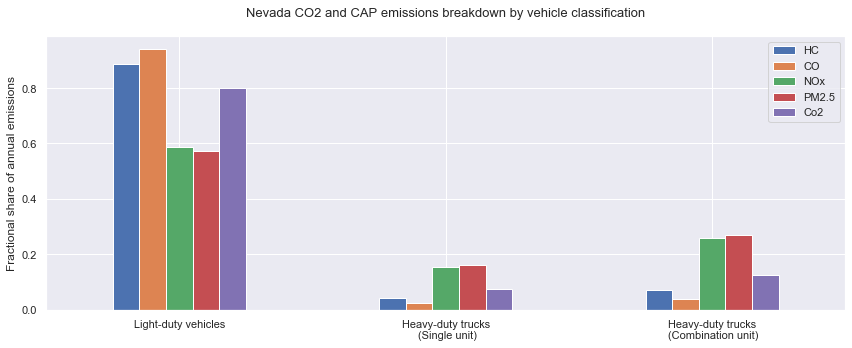

In [229]:
import seaborn as sns

sns.set()
fig, ax = plt.subplots(1,1,figsize=(12,5))
(emissions_normalized).plot.bar(ax=ax)
ax.set_xticklabels(emissions_normalized.index, rotation=0)
ax.set_ylabel('Fractional share of annual emissions')
ax.set_title('Nevada CO2 and CAP emissions breakdown by vehicle classification', fontsize = 13, pad= 20)
plt.tight_layout()
#fig.savefig(('figures/nv_TransporationEmissions_byVehicleClassification_percent.png'), bbox_inches='tight', transparent=False,dpi=80)

In [230]:
colors = sns.color_palette(n_colors=len(pollutants))

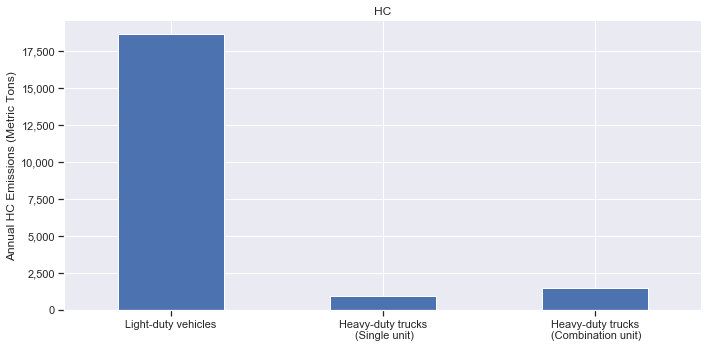

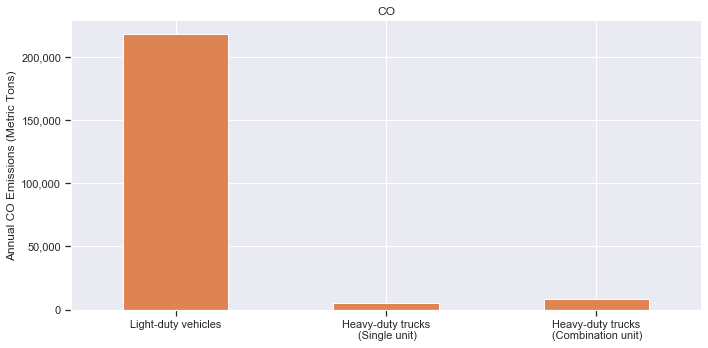

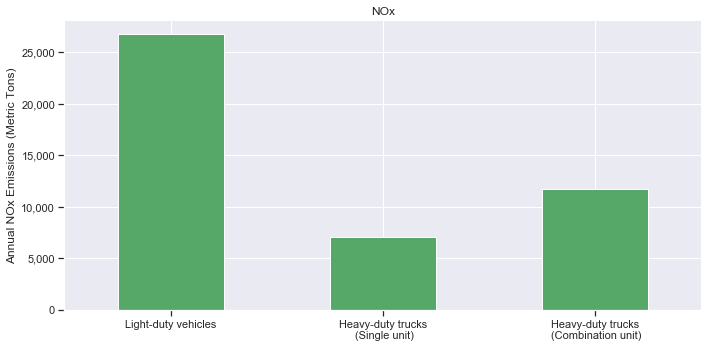

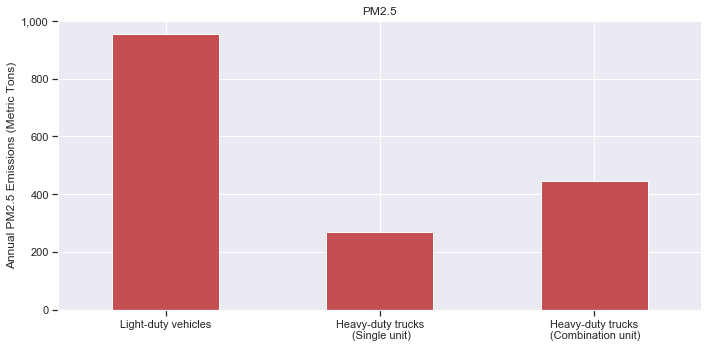

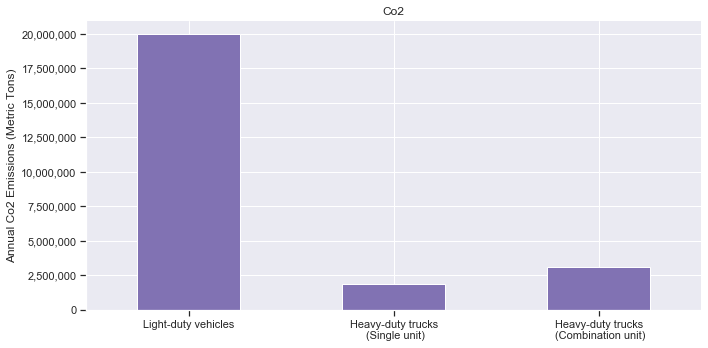

In [231]:
for i,pol in enumerate(pollutants):
    fig, ax = plt.subplots(1,1)
    diff_emissions.plot(kind='bar', y=str(pol), figsize=(10,5), ax=ax, legend=False, color=colors[i], rot=0)
    ax.ticklabel_format(style='plain', axis='y')
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.set_xlabel('')
    ax.set_ylabel('Annual {} Emissions (Metric Tons)'.format(str(pol)))
    ax.set_title(str(pol))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.tight_layout()
    #fig.savefig(('figures/nv_transporationEmissions_byVehicleClassification_mass_{}.png'.format(pol)), bbox_inches='tight', transparent=False,dpi=80)
    


In [232]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
diff_emissions.sum()

HC         20994.903
CO        231167.252
NOx        45417.818
PM2.5       1668.956
Co2     24928710.752
dtype: float64